# DATA SCIENCE CHALLENGE - CARD TRANSACTIONS

This coding and analysis challenge is designed to test your skill and intuition analyzing real[-ish] world data. For the challenge, we will use credit card transactions data. Note that this dataset loosely resembles real transactional data from Capital One credit card customers, but the entities and relations within are purely fictional. No persons, places, or things lost their identity in the making of this dataset.

# Candidate ID: C1836682_BS

In [1]:
import pandas as pd
import numpy as np
import re
import sys
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import random
random.seed(1)

#  Python version

In [2]:
print("Python Version", sys.version)

Python Version 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


In [3]:
dict1 = {}

## **QUESTION** 1

**a.   *READING THE DATASET FROM THE TEXT FILE* .**

In [4]:
text_data = open("transactions.txt","r")
data = text_data.readlines()

for rows in data:
    i = rows.strip().split(",")

    for j in i:
      index = j.index(":")
      feature = j[:index]
      feature = re.sub(r'[^\w\s]','',feature).strip()
      values = j[index+1:]

      if feature not in dict1.keys():
        dict1[feature] = []
        dict1[feature].append(values)
      else:
        dict1[feature].append(values)

In [5]:
df = pd.DataFrame(dict1)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,"""737265056""","""737265056""",5000.0,5000.0,"""2016-08-13T14:27:32""",98.55,"""Uber""","""US""","""US""","""02""",...,"""""",0.0,"""""","""""","""""",false,"""""","""""",false,false}
1,"""737265056""","""737265056""",5000.0,5000.0,"""2016-10-11T05:05:54""",74.51,"""AMC #191138""","""US""","""US""","""09""",...,"""""",0.0,"""""","""""","""""",true,"""""","""""",false,false}
2,"""737265056""","""737265056""",5000.0,5000.0,"""2016-11-08T09:18:39""",7.47,"""Play Store""","""US""","""US""","""09""",...,"""""",0.0,"""""","""""","""""",false,"""""","""""",false,false}
3,"""737265056""","""737265056""",5000.0,5000.0,"""2016-12-10T02:14:50""",7.47,"""Play Store""","""US""","""US""","""09""",...,"""""",0.0,"""""","""""","""""",false,"""""","""""",false,false}
4,"""830329091""","""830329091""",5000.0,5000.0,"""2016-03-24T21:04:46""",71.18,"""Tim Hortons #947751""","""US""","""US""","""02""",...,"""""",0.0,"""""","""""","""""",true,"""""","""""",false,false}


### ***b.  Please describe the structure of the data. Number of records and fields in each record.***

In [6]:
rows = len(df.axes[0])
columns = len(df.axes[1])
print("Number of records:",rows)
print("Number of fields:",columns)

Number of records: 786363
Number of fields: 29


**CLEANED THE DATASET FOR FURTHER ANALYSIS.**


1.   Removed the braces "{" and white spaces from the columns.
2.   Replaced quotes by empty string.
3.   To remove empty strings, replaced with null value and remvoved them.


In [7]:
# removing braces from the columns
df.replace("}","",regex = True, inplace = True)

# Replacing quotes by empty string
attributes = ["accountNumber","transactionDateTime","accountOpenDate","dateOfLastAddressChange","transactionType","accountNumber","customerId","posEntryMode","posConditionCode", 
              "merchantCategoryCode","cardCVV","enteredCVV","cardLast4Digits"]
for i in attributes:
  df[i] = df[i].str.replace('"',"")

# removing white spaces
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# To remove empty strings replaced with null value and removed them from the dataset.
df.replace("", np.nan, inplace = True)
df.dropna(inplace = True)

In [8]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
count,781207,781207,781207,781207,781207,781207,781207,781207,781207,781207,...,781207,781207,781207,781207,781207,781207,781207,781207,781207,781207
unique,4998,4998,10,519470,771620,65931,2489,5,5,5,...,1,485232,1,1,1,2,1,1,2,2
top,380680241,380680241,5000.0,250.0,2016-12-25T14:04:15,0.0,"""Uber""","""US""","""US""",05,...,"""""",0.0,"""""","""""","""""",false,"""""","""""",false,false
freq,32648,32648,200597,5980,4,22121,25437,769623,773405,314565,...,781207,33448,781207,781207,781207,430666,781207,781207,780169,769094


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781207 entries, 0 to 786362
Data columns (total 29 columns):
accountNumber               781207 non-null object
customerId                  781207 non-null object
creditLimit                 781207 non-null object
availableMoney              781207 non-null object
transactionDateTime         781207 non-null object
transactionAmount           781207 non-null object
merchantName                781207 non-null object
acqCountry                  781207 non-null object
merchantCountryCode         781207 non-null object
posEntryMode                781207 non-null object
posConditionCode            781207 non-null object
merchantCategoryCode        781207 non-null object
currentExpDate              781207 non-null object
accountOpenDate             781207 non-null object
dateOfLastAddressChange     781207 non-null object
cardCVV                     781207 non-null object
enteredCVV                  781207 non-null object
cardLast4Digits       

**Dropped the columns which are empty strings.**




In [10]:
# remove the columns which are empty strings
df.drop(["echoBuffer","merchantCity","merchantState","merchantZip","posOnPremises","recurringAuthInd"],axis = 1, inplace = True)

*    All the columns data are imported as strings, some of the 
columns which are numbers should be in integer or float type.
*    Converted the columns into their respective integer and float datatypes. 

In [11]:
int_cols = ["accountNumber","customerId","posEntryMode","posConditionCode","cardCVV","enteredCVV",
            "cardLast4Digits"]
float_cols = ["creditLimit","availableMoney","transactionAmount","currentBalance"]

for col in int_cols:
  df[col] = df[col].astype(int)

for col in float_cols:
  df[col] = df[col].astype(float)

### ***SUMMARY STATSISICS FOR FRAUD TRANSACTION.***

In [12]:
fraud = df[df["isFraud"] == "true"]
fraud.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,1.211300e+04,1.211300e+04,12113.000000,12113.000000,12113.000000,12113.000000,12113.000000,12113.000000,12113.000000,12113.000000,12113.000000
mean,5.296615e+08,5.296615e+08,11059.708578,6142.838177,225.208671,10.109304,3.892925,562.461405,562.112111,4781.641625,4916.870400
std,2.521933e+08,2.521933e+08,11976.012629,8699.367525,189.730771,17.798440,13.241595,260.713298,260.436751,3019.710809,7115.172866
min,1.007378e+08,1.007378e+08,250.000000,-614.390000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,0.000000
25%,3.269197e+08,3.269197e+08,5000.000000,1083.280000,85.610000,2.000000,1.000000,339.000000,339.000000,2109.000000,823.020000
50%,4.749347e+08,4.749347e+08,7500.000000,3120.990000,176.870000,9.000000,1.000000,548.000000,548.000000,4648.000000,2744.810000
75%,7.663105e+08,7.663105e+08,15000.000000,7500.000000,311.730000,9.000000,1.000000,823.000000,818.000000,7473.000000,5651.070000
max,9.992587e+08,9.992587e+08,50000.000000,50000.000000,1608.350000,90.000000,99.000000,998.000000,998.000000,9996.000000,47473.940000


### ***SUMMARY STATISTICS FOR NORMAL TRANSACTION***

In [13]:
normal = df[df["isFraud"] == "false"]
normal.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,posEntryMode,posConditionCode,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.690940e+05,7.690940e+05,769094.000000,769094.000000,769094.000000,769094.000000,769094.000000,769094.000000,769094.000000,769094.000000,769094.000000
mean,5.373438e+08,5.373438e+08,10751.979927,6249.615876,135.592143,9.032991,3.261506,544.219322,543.930855,4757.241155,4502.364051
std,2.554587e+08,2.554587e+08,11626.919752,8878.871615,146.516221,16.755899,9.738056,261.511810,261.545569,2996.356506,6445.093762
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,2.000000,1.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.160000,33.200000,5.000000,1.000000,309.000000,309.000000,2178.000000,688.222500
50%,5.079073e+08,5.079073e+08,7500.000000,3184.790000,86.780000,5.000000,1.000000,535.000000,535.000000,4733.000000,2447.775000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,189.460000,9.000000,1.000000,785.000000,785.000000,7338.000000,5286.820000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,90.000000,99.000000,998.000000,998.000000,9998.000000,47498.810000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 781207 entries, 0 to 786362
Data columns (total 23 columns):
accountNumber               781207 non-null int32
customerId                  781207 non-null int32
creditLimit                 781207 non-null float64
availableMoney              781207 non-null float64
transactionDateTime         781207 non-null object
transactionAmount           781207 non-null float64
merchantName                781207 non-null object
acqCountry                  781207 non-null object
merchantCountryCode         781207 non-null object
posEntryMode                781207 non-null int32
posConditionCode            781207 non-null int32
merchantCategoryCode        781207 non-null object
currentExpDate              781207 non-null object
accountOpenDate             781207 non-null object
dateOfLastAddressChange     781207 non-null object
cardCVV                     781207 non-null int32
enteredCVV                  781207 non-null int32
cardLast4Digits          

### ***Plot a histogram of the processed amounts of each transaction, the transactionAmount column.***

* **Most of the data is on the left side of the histogtam but few values are to the right. So, the data is right skewed.**
* **Further one more observation can be understood form the histogram, that the transaction amount spent by the people, most of them fall under the category 0 to  250 dollars.**






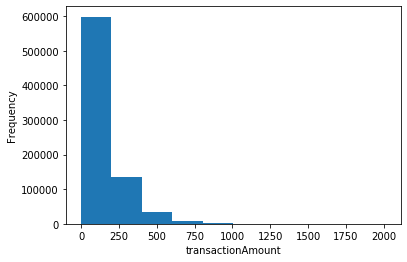

In [15]:
df["transactionAmount"].plot.hist()
plt.xlabel("transactionAmount")
plt.show()

## ***Can you programmatically identify reversed and multi-swipe transactions?***

In [16]:
# Number of reversed transactions.
df["transactionType"].value_counts()

PURCHASE                740944
REVERSAL                 20187
ADDRESS_VERIFICATION     20076
Name: transactionType, dtype: int64

## ***What total number of transactions and total dollar amount do you estimate for the reversed transactions?***


*   Total number of reversed transactions = 20187.
*   Total dollar amount for the reversed transactions = 2805135.29.





In [17]:
# Total dollar amount for Reversed transaction 
df[df["transactionType"] == 'REVERSAL' ]["transactionAmount"].sum()

2805135.29

Converted **DATETIME  "object"** datatype columns into **datetime datatype** for further analysis

In [18]:
df["transactionDateTime"] = pd.to_datetime(df["transactionDateTime"], format = '%Y-%m-%dT%H:%M:%S')
df[["accountOpenDate","dateOfLastAddressChange"]] = df[["accountOpenDate","dateOfLastAddressChange"]].apply(lambda x: pd.to_datetime(x,format = '%Y-%m-%d'))

**Parsed datetime columns into respective year, month, day, week columns. So, we can feed the parsed data to the Machine Learning algorithms to observe patterns like date of address change is closer to the transaction date, which might be helpful to detect fradulent activites.**

In [19]:
df["accountOpen_Year"] = df["accountOpenDate"].dt.year
df["accountOpen_Month"] = df["accountOpenDate"].dt.month
df["accountOpen_Day"] = df["accountOpenDate"].dt.day
df["accountOpen_Week"] = df["accountOpenDate"].dt.dayofweek

df["dateOfLastAddressChange_Year"] = df["dateOfLastAddressChange"].dt.year
df["dateOfLastAddressChange_Month"] = df["dateOfLastAddressChange"].dt.month
df["dateOfLastAddressChange_Day"] = df["dateOfLastAddressChange"].dt.day
df["dateOfLastAddressChange_Week"] = df["dateOfLastAddressChange"].dt.dayofweek

df["transaction_Year"] = df["transactionDateTime"].dt.year
df["transaction_Month"] = df["transactionDateTime"].dt.month
df["transaction_Day"] = df["transactionDateTime"].dt.day
df["transaction_Week"] = df["transactionDateTime"].dt.dayofweek

# Multi-swipe Transactions

**In general, vendor websites take 15-30 seconds in normal internet speed to complete a credit card transaction. So, I have considered the short time span of 1 minute to charge the customer multiple times accidently by a vendor.**

*   **Total number of Multi-swipe transactions = 4470**
*   **Total dollar amount for the Multi-swipe transactions = 658940.34**




In [20]:
min_diff = pd.Timedelta(minutes = 1) 
df["duplicated"] = df.sort_values('transactionDateTime').groupby(['transactionAmount','customerId']).transactionDateTime.diff().abs().le(min_diff).astype(int)
df["duplicated"].value_counts()

0    776737
1      4470
Name: duplicated, dtype: int64

In [21]:
df[df["duplicated"] == 1]["transactionAmount"].sum()

658940.34

## **QUESTION 4**

**Predictive Model**


*   The features I felt important are cardCVV, enteredCVV, expirationDateKeyInMatch, currentBalance, availableMoney, posConditionCode (transaction conditions at the point of Sale or Service), posEntryMode(how the transaction was captured like card has been inserted or swiped), merchantCategoryCode (describes vendors primary business activites).
*   The other features I considered are transactionDateTime, dateOfLastAddressChange, AccountOpenDate. Because there might be some correlation among these features. The date of Address change might be related to the transaction date.
*   I have converted categorical variables into numeric variables by using LabelEncoding.
*   I have implemented RandomforestClassifier. The reason I considered RandomForestClassifier is it contains multiple decision trees, and each tree is independent of other. Each tree checks different features or conditions.
*   The other important quality of random forest classifier is it provides a great tool to determine the feature importance. It computes the score automatically for each feature everytime to make a decision.
*   To evaulate the model I have split the dataset into training data and test data (80 : 20).





In [22]:
# converting categorical variables into numerical variables using label encoding.
le = preprocessing.LabelEncoder()
df[["transactionType","cardPresent","merchantCategoryCode","expirationDateKeyInMatch"]]=df[["transactionType","cardPresent","merchantCategoryCode","expirationDateKeyInMatch"]].apply(le.fit_transform)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpen_Week,dateOfLastAddressChange_Year,dateOfLastAddressChange_Month,dateOfLastAddressChange_Day,dateOfLastAddressChange_Week,transaction_Year,transaction_Month,transaction_Day,transaction_Week,duplicated
0,737265056,737265056,5000.0,5000.0,2016-08-13 14:27:32,98.55,"""Uber""","""US""","""US""",2,...,5,2015,3,14,5,2016,8,13,5,0
1,737265056,737265056,5000.0,5000.0,2016-10-11 05:05:54,74.51,"""AMC #191138""","""US""","""US""",9,...,5,2015,3,14,5,2016,10,11,1,0
2,737265056,737265056,5000.0,5000.0,2016-11-08 09:18:39,7.47,"""Play Store""","""US""","""US""",9,...,5,2015,3,14,5,2016,11,8,1,0
3,737265056,737265056,5000.0,5000.0,2016-12-10 02:14:50,7.47,"""Play Store""","""US""","""US""",9,...,5,2015,3,14,5,2016,12,10,5,0
4,830329091,830329091,5000.0,5000.0,2016-03-24 21:04:46,71.18,"""Tim Hortons #947751""","""US""","""US""",2,...,3,2015,8,6,3,2016,3,24,3,0


In [23]:
X = df[["accountNumber", "creditLimit","availableMoney","transactionAmount","currentBalance","posEntryMode","posConditionCode","transactionType",
       "accountOpen_Year","accountOpen_Month","accountOpen_Day","accountOpen_Week","dateOfLastAddressChange_Year","dateOfLastAddressChange_Month",
       "dateOfLastAddressChange_Day","dateOfLastAddressChange_Week","transaction_Year","transaction_Month","transaction_Day","transaction_Week",
       "cardPresent","merchantCategoryCode","expirationDateKeyInMatch","cardCVV","enteredCVV","cardLast4Digits"]]

 **Replaced "isFraud --> true --> 1**
                       **false --> 0** 
           

In [24]:
df["isFraud"].replace({"true":1,"false":0},inplace = True)
y = df["isFraud"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [25]:
# splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

**RANDOM FOREST CLASSIFIER**

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

*  Though the accuracy and precison of Random Forest Classifier are better, the recall is very low. The reason might be because of highly imbalanced dataset. For every 1000 normal transactions we have 15 fraud transactions.
*  So to balance the dataset I have used SMOTE technique.

In [27]:
# accuarcy
accuracy = accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(accuracy))

# precision
precision = precision_score(Y_test,y_pred)
print("The precision is {}".format(precision))

# recall
recall = recall_score(Y_test,y_pred)
print("The recall is {}".format(recall))

# f1_score
F1_score = f1_score(Y_test,y_pred)
print("The F1-Score is {}".format(F1_score))

The accuracy is 0.9849656302402683
The precision is 0.6875
The recall is 0.027672955974842768
The F1-Score is 0.053204353083434096


In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

**SMOTE TECHNIQUE**


*   To have the better performance, I have used combination of SMOTE with random undersampling of the majority class.
*   I have first oversampled the minority class to have 10 percent of the number of examples of the majority class, followed by random undersampling to reduce the number of examples in the majority class to have 50 percent more than the minority class.
*   Implemented the above technique by using a pipeline.

In [29]:
over = SMOTE(sampling_strategy = 0.1)
under = RandomUnderSampler(sampling_strategy = 0.5)
steps = [("o",over),("u",under)]
pipeline = Pipeline(steps = steps)

X,y = pipeline.fit_resample(X,y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_test)

 *  After implementation of SMOTE technique,the recall has improved  to 85% approximately. 
 * The precsion is 93% approximately, so out of 100 transactions the model predicts 93 correctly.


In [31]:
# accuarcy
accuracy = accuracy_score(Y_test,y_pred)
print("The accuracy is {}".format(accuracy))

# precision
precision = precision_score(Y_test,y_pred)
print("The precision is {}".format(precision))

# recall
recall = recall_score(Y_test,y_pred)
print("The recall is {}".format(recall))

# f1_score
F1_score = f1_score(Y_test,y_pred)

print("The F1-Score is {}".format(F1_score))

The accuracy is 0.9308282408009362
The precision is 0.9347826086956522
The recall is 0.8537906137184116
The F1-Score is 0.8924528301886793


**If I have more time.**
*   Plot the correaltion maps among the variables.
*   I will implementK-fold Cross validation, it ensures a less biased model compared to other models.
*   To reduce the number of fetures, I will use the principal component analysis (PCA).
*   Implement other models like Isolation Forest, Neural Networks to improve recall.
* Instead of OverSampling and UnderSampling, will penalize the minority class with more weight compare to majority class.

